# In this notebook, we are conducting basical visual analysis
Files that we will be looking at include:  
../Data/academy_monthly_desktop_201501-202309.json  
../Data/academy_monthly_mobile_201501-202309.json  
../Data/academy_monthly_cumulative_201501-202309.json  

Time is in: YYYYMMDDHH format  

# Imports

In [1]:
import matplotlib.pyplot as plt
import json
import os
from datetime import datetime

# Get all data
#### Step 1: Get all data for desktop monthly access of articles. 
#### Step 2: Get all data for mobile monthly access of articles. 
#### Step 3: Get all data for cumulative monthly access of articles. 

In [2]:
# Step 1: Get all data for desktop monthly access of articles. 
data_desktop = open('../Data/academy_monthly_desktop_201501-202309.json')
data_desktop = json.load(data_desktop)

# Step 2: Get all data for mobile monthly access of articles. 
data_mobile = open('../Data/academy_monthly_mobile_201501-202309.json')
data_mobile = json.load(data_mobile)

# Step 3: Get all data for cumulative monthly access of articles. 
data_cumulative = open('../Data/academy_monthly_cumulative_201501-202309.json')
data_cumulative = json.load(data_cumulative)

# Visualization 1: 
Maximum Average and Minimum Average - The first graph should contain time series for the articles that have the highest average monthly page requests and the lowest average monthly page requests for desktop access and mobile access. Your graph should have four lines (max desktop, min desktop, max mobile, min mobile).

#### Step 1: First we will loop through loaded desktop viewship data and calculate the average monthly viewership for each article.
#### Step 2: Next, sort each article based on average desktop monthly viewship.
#### Step 3: Then we will keep track of the articles that have the most and least average monthly desktop viewership.

#### Step 4: First we will loop through loaded mobile viewship data and calculate the average monthly viewership for each article.
#### Step 5: Next, sort each article based on average mobile monthly viewship.
#### Step 6: Then we will keep track of the articles that have the most and least average monthly mobile viewership.

#### Step 7: Finally, we will plot the timeseries graphs of the articles that have the highest and lowest average monthly viewership for both desktop and mobile. 

# NOTE: For this visualization I am assuming that articles with 0 total views are to NOT be included in considerations for the visualization.

In [3]:
#Step 1: Loop through loaded desktop viewship data and calculate the average monthly viewership for each article
average_desktop_viewship = {}
for article in data_desktop:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    
    #If the averageviewship is 0, skip it
    if(averageviewship == 0): continue
    
    average_desktop_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values
    }

#Step 2: Next, sort each article based on average desktop monthly viewship.
average_desktop_viewship = sorted(average_desktop_viewship.items(), key=lambda x:x[1]['averageviewship'])

#Step 3: Keep track of the articles that have the most and least average monthly desktop viewership
min_desktop = average_desktop_viewship[0]
max_desktop = average_desktop_viewship[len(average_desktop_viewship)-1]

In [4]:
#Step 4: Loop through loaded mobile viewship data and calculate the average monthly viewership for each article
average_mobile_viewship = {}
for article in data_mobile:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    
    #If the averageviewship is 0, skip it
    if(averageviewship == 0): continue
    
    average_mobile_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values
    }

#Step 5: Next, sort each article based on average mobile monthly viewship.
average_mobile_viewship = sorted(average_mobile_viewship.items(), key=lambda x:x[1]['averageviewship'])

#Step 6: Keep track of the articles that have the most and least average monthly mobile viewership
min_mobile = average_mobile_viewship[0]
print(min_mobile)
max_mobile = average_mobile_viewship[len(average_mobile_viewship)-1]

('8Â½', {'averageviewship': 0.16666666666666666, 'months': ['2016060100', '2017090100', '2017100100', '2018090100', '2021010100', '2023090100'], 'values': [0, 0, 0, 1, 0, 0]})


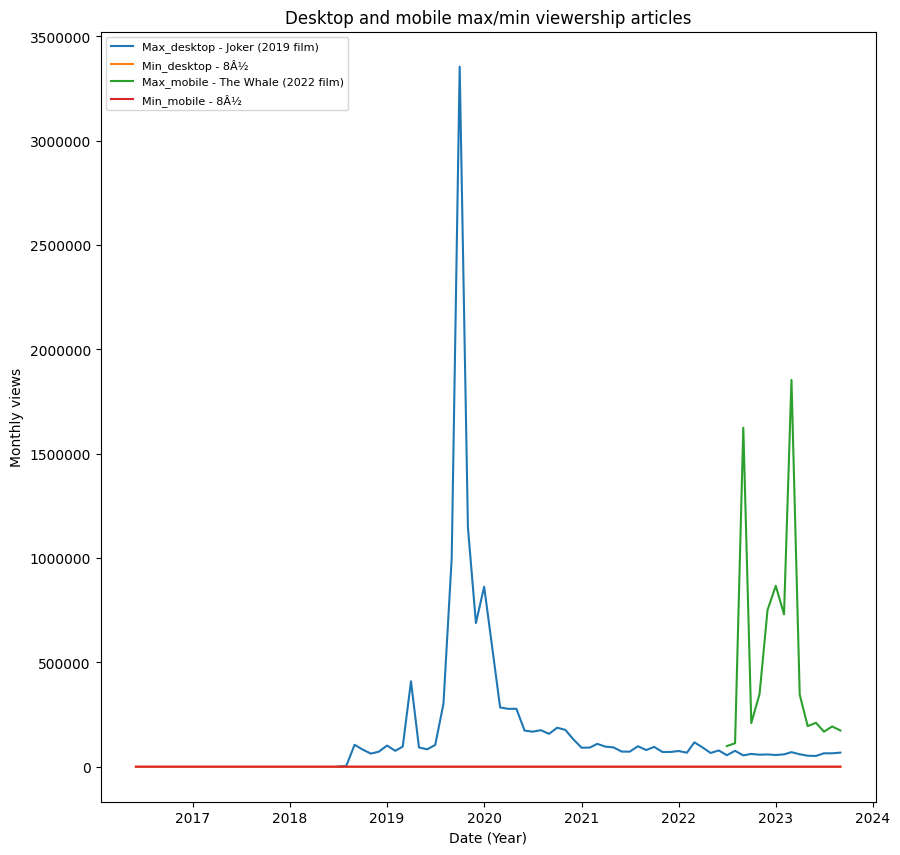

In [5]:
#Step 7: Plot the timeseries graphs of the articles that have the highest and lowest average monthly viewership for both desktop and mobile.
fig, ax = plt.subplots(figsize=(10,10))
max_desktop_x = [datetime.strptime(d, '%Y%m%d%H') for d in max_desktop[1]['months']]
max_desktop_y = max_desktop[1]['values']
min_desktop_x = [datetime.strptime(d, '%Y%m%d%H') for d in min_desktop[1]['months']]
min_desktop_y = min_desktop[1]['values']
max_mobile_x = [datetime.strptime(d, '%Y%m%d%H') for d in max_mobile[1]['months']]
max_mobile_y = max_mobile[1]['values']
min_mobile_x = [datetime.strptime(d, '%Y%m%d%H') for d in min_mobile[1]['months']]
min_mobile_y = min_mobile[1]['values']
ax.plot(max_desktop_x, max_desktop_y, label=f'Max_desktop - {max_desktop[0]}')
ax.plot(min_desktop_x, min_desktop_y, label=f'Min_desktop - {min_desktop[0]}')
ax.plot(max_mobile_x, max_mobile_y, label=f'Max_mobile - {max_mobile[0]}')
ax.plot(min_mobile_x, min_mobile_y, label=f'Min_mobile - {min_mobile[0]}')
plt.title('Desktop and mobile max/min viewership articles')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Monthly views')
ax.legend(loc=2,prop={'size': 8})
plt.savefig("../Results/MinMaxAverages.png")
plt.show()

# Visualization 2: 
#### Step 1: First we will loop through loaded desktop viewship data and store the peak desktop viewership for each article.
#### Step 2: Next, sort each article based on peak desktop viewship.
#### Step 3: First we will loop through loaded mobile viewship data and calculate the peak viewership for each article.
#### Step 4: Next, sort each article based on peak mobile viewship.
#### Step 5: Finally, we will plot the timeseries graphs of the top 10 articles that have the highest peak viewership for both desktop and mobile. 
Top 10 Peak Page Views - The second graph should contain time series for the top 10 article pages by largest (peak) page views over the entire time by access type. You first find the month for each article that contains the highest (peak) page views, and then order the articles by these peak values. Your graph should contain the top 10 for desktop and top 10 for mobile access (20 lines).

In [6]:
#Step 1: Loop through loaded desktop viewship data and store the peak dekstop viewership for each article.
peak_desktop_viewship = {}
for article in data_desktop:
    name = article[0]
    months = []
    values = []
    peakviewship = 0
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        if(article[1]["Views"][x] > peakviewship):
            peakviewship = article[1]["Views"][x]
    
    peak_desktop_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values,
        "peakviewship": peakviewship
    }

#Step 2: Sort each article based on peak desktop viewship.
peak_desktop_viewship = sorted(peak_desktop_viewship.items(), key=lambda x:x[1]['peakviewship'], reverse=True)

In [7]:
#Step 3: Loop through loaded mobile viewship data and store the peak mobile viewership for each article.
peak_mobile_viewship = {}
for article in data_desktop:
    name = article[0]
    months = []
    values = []
    peakviewship = 0
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        if(article[1]["Views"][x] > peakviewship):
            peakviewship = article[1]["Views"][x]
    
    peak_mobile_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values,
        "peakviewship": peakviewship
    }

#Step 4: Sort each article based on peak desktop viewship.
peak_mobile_viewship = sorted(peak_mobile_viewship.items(), key=lambda x:x[1]['peakviewship'], reverse=True)

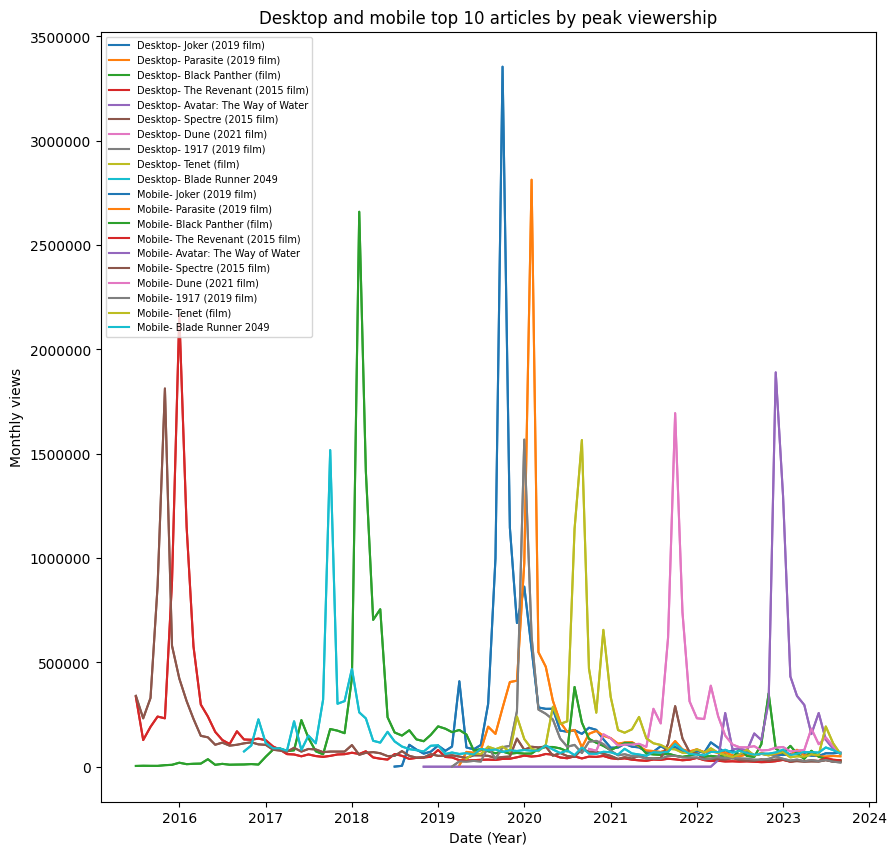

In [8]:
#Step 5: Plot the timeseries graphs of the top 10 articles that have the highest peak viewership for both desktop and mobile. 
fig, ax = plt.subplots(figsize=(10,10))

#Desktop
for i in range(10):
    x = [datetime.strptime(d, '%Y%m%d%H') for d in peak_desktop_viewship[i][1]['months']]
    y = peak_desktop_viewship[i][1]['values']
    ax.plot(x, y, label=str("Desktop- " + peak_desktop_viewship[i][0]))

#Mobile
for i in range(10):
    x = [datetime.strptime(d, '%Y%m%d%H') for d in peak_mobile_viewship[i][1]['months']]
    y = peak_mobile_viewship[i][1]['values']
    ax.plot(x, y, label=str("Mobile- " + peak_mobile_viewship[i][0]))

#Titles, labels, etc. 
plt.title('Desktop and mobile top 10 articles by peak viewership')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Monthly views')
ax.legend(loc=2,prop={'size': 7})
plt.savefig("../Results/PeakViewership.png")
plt.show()

# Visualization 3: 
Fewest Months of Data - The third graph should show pages that have the fewest months of available data. These will all be relatively short time series and should contain a set of the most recent academy award winners. Your graph should show the 10 articles with the fewest months of data for desktop access and the 10 articles with the fewest months of data for mobile access.

#### Step 1: First we will loop through loaded desktop viewship data and store the number of months of viewership for each article.
#### Step 2: Next, sort each article based on number of months of viewership.
#### Step 3: First we will loop through loaded mobile viewship data and store the number of months of viewership for each article.
#### Step 4: Next, sort each article based on number of months of viewership.
#### Step 5: Finally, we will plot the timeseries graphs of the bottom 10 articles that have the lowest number of recorded months for both desktop and mobile. 

# NOTE: Some data has months with 0 viewership, I am assuming we should include these even though they make the visualization worse as the main question is about number of recorded months, and not viewership counts here. It is likely that the month count is correct but the viewership is not recorded. 

In [9]:
# Step 1: Loop through loaded desktop viewship data and store the number of months of viewership for each article.
number_months_desktop_viewship = {}
for article in data_desktop:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    peakviewship = 0
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        if(article[1]["Views"][x] > peakviewship):
            peakviewship = article[1]["Views"][x]
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    
    number_months_desktop_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values,
        "numMonths": len(months)
    }

# Step 2: Sort each article based on number of months of viewership.
number_months_desktop_viewship = sorted(number_months_desktop_viewship.items(), key=lambda x:x[1]['numMonths'], reverse=False)

In [10]:
# Step 3: Loop through loaded mobile viewship data and store the number of months of viewership for each article.
number_months_mobile_viewship = {}
for article in data_desktop:
    name = article[0]
    totalviewship = 0
    months = []
    values = []
    peakviewship = 0
    for x in article[1]["Views"]:
        months.append(x)
        values.append(article[1]["Views"][x])
        if(article[1]["Views"][x] > peakviewship):
            peakviewship = article[1]["Views"][x]
        totalviewship += article[1]["Views"][x]
    averageviewship = totalviewship / len(article[1]["Views"])
    
    number_months_mobile_viewship[name] = {
        "averageviewship": averageviewship,
        "months": months,
        "values": values,
        "numMonths": len(months)
    }

#Step 4: Sort each article based on number of months of viewership.
number_months_mobile_viewship = sorted(number_months_mobile_viewship.items(), key=lambda x:x[1]['numMonths'], reverse=False)

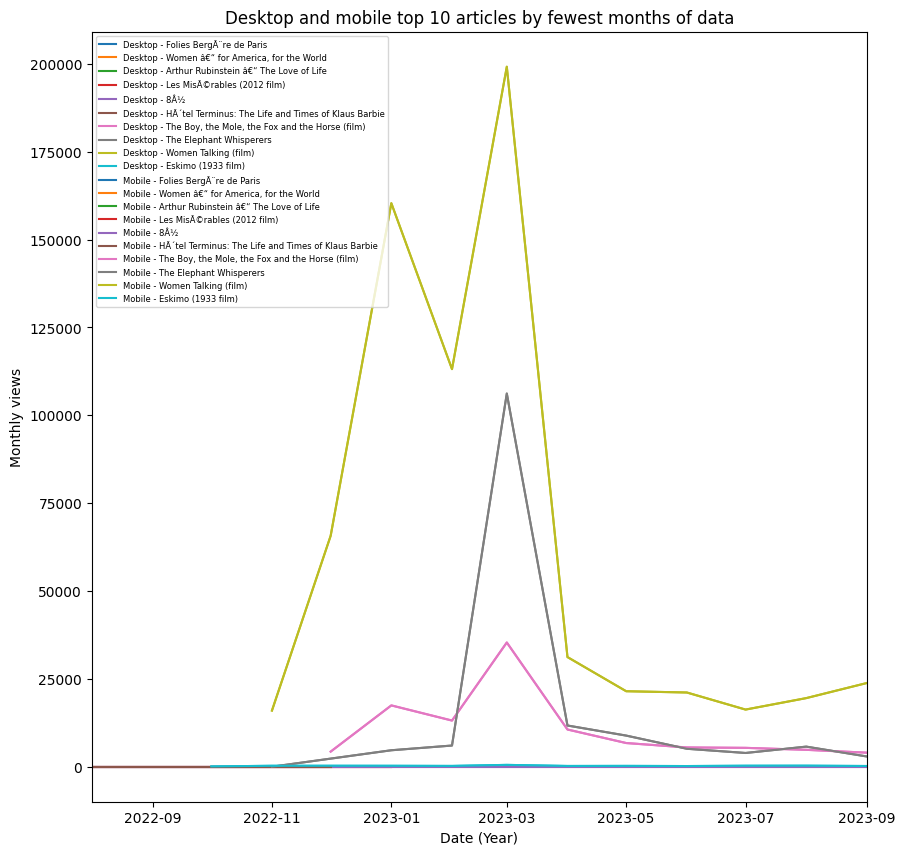

In [51]:
# Step 5: Plot the timeseries graphs of the bottom 10 articles that have the lowest number of recorded months for both desktop and mobile. 
fig, ax = plt.subplots(figsize=(10,10))

#Desktop
for i in range(10):
    x = [datetime.strptime(d, '%Y%m%d%H') for d in number_months_desktop_viewship[i][1]['months']]
    y = number_months_desktop_viewship[i][1]['values']
    ax.plot(x, y, label=str("Desktop - " + number_months_desktop_viewship[i][0]))

#Mobile
for i in range(10):
    x = [datetime.strptime(d, '%Y%m%d%H') for d in number_months_mobile_viewship[i][1]['months']]
    y = number_months_mobile_viewship[i][1]['values']
    ax.plot(x, y, label=str("Mobile - " + number_months_mobile_viewship[i][0]))
    
#Titles, labels, etc. 
plt.title('Desktop and mobile top 10 articles by fewest months of data')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.set_xlabel('Date (Year)')
ax.set_ylabel('Monthly views')
ax.set_xlim([datetime.strptime("2022080100", '%Y%m%d%H'), datetime.strptime("2023090100", '%Y%m%d%H')])
ax.legend(loc=2,prop={'size': 6})
plt.savefig("../Results/FewestMonths.png")
plt.show()